# Milling Project 

## Section 1: Introduction 

<img src="./intro_mill_geometry.png" width=400 />

### Section 1.1: Problem Description 

Numerical modeling of the milling of paper pulp using a pressure-driven rotating disk mill.

### Section 2.1: Questions 

1. water vs. pulp (particle size distribution and particle surface tension/hardness): change in viscosity - local changes in strain and shear stress;
2. surface roughness: measured values, observed effects, parameter setting for turbulent viscosity;
3. to what extend is temperature and pre-heating a relevant factor;  

### Section 3.1: Remarks

1. in early geometry models outlet too close to main flow domain;
2. non-linear laminar viscosity and turbulent are expected to play complementary roles. We expect that both will need to be modeled;
3. the milling process alters the particle size distribution and therefore the laminar viscosity of the pulp. In bringing the gap to the lab measurements, we suggest to perform lab measurements with pulp with the grinding process switched off;
4. not sure whether merely modeling the lasminar viscosity of the pulp is sufficient. Not sure whether modeling the six components of the stress tensor (as in the Oldroyd-B model using the upper-convective derivative) is required here.  
5. we suggest to place sufficiently anonymous geometry in public domain; 
6. we suggest to revert to OpenFoam to automate workflow and to make large scale simulations (in case applicable) possible; 

### Section 4.1: State of the Art 

What literature/state-of-the-art do we base our work on? 

### Section 5.1: Research Question 

1. mesh independent results for shear stress in the airgap (otherwise results numerics induced and thus hard to compare).  
2. note: lab data should be used as boundary conditions in the mathematical model. 

### Section 6.1: Notes on these Notes 

<b>To do: 0-directory and system/graphs</b>

1. add mass flow rate at the outlet;
2. refine gnuplot functionality to view the shear stress in the airgap;   

<b>Goals: Non-Isothermal RANS Flow Simulations with Water as Newtonian Fluid</b>

1. obtain mesh-independent results for the shear stress in the airgap. Else impossible to access whether results are due to the RANS turbulence closure model (standard k-epsilon model or otherwise) or the numerics of the discretization;   
2. perform parameter studies to access how flow quantities of interest (the shear stress in the air gap, the outlet mass flow rate) depend on operating conditions (the angular velocity of the rotor, the surface roughess of the rotor, temperature of the fluid, viscosity of the fluid (artifically modified), the thickness of the airgap) and the geometry (outer boundaries, stent?) of the flow domain. Ask for guesses by experiments; 

## Section 2: Governing Fluid Equations

### Section 1.2: Material Properties 
1. water: molecular viscosity of water, kinematic viscosity of water, thermal conductivity of water;
2. pulp: shear thinning fluid with molecular viscosity of pulp that depends on the temperature and the shear stress in the fluid; 
3. <div class="alert alert-block alert-info"> add numbers from references here. </div>

### Section 2.2: Stationary Laminar Isothermal Newtonian Fluid 

Describe flow equations for stationary laminar isothermal Newtonian fluid 
1. stationary incompressible (low Mach) constant density flow using the (laminar) [Navier-Stokes](https://en.wikipedia.org/wiki/Navier–Stokes_equations) equations in kinematic quantities for the conservation of mass and momentum for the laminar flow of water. Equations in terms of velocity $\mathbf{V}(\mathbf{x},t)$ (volVectorField in $\text{m}/\text{s}$) and kinematic pressure $p(\mathbf{x},t)$ (volScalarField in $\text{m}^2/\text{s}^2$) (pressure scaled by density);  
2. boundary conditions for pressure $p$ and velocity: for inlet (prescribed velocity profile), stationary walls (no-slip) and outlet (fixed pressure); 
3. modeling of rotating surface by imposing (fixing) the velocity on the rotating surface using the [rotatingWallVelocity boundary condition](https://doc.openfoam.com/2312/tools/processing/boundary-conditions/rtm/derived/wall/rotatingWallVelocity/). This is similar to the e.g. lid driven cavity problem](https://www.openfoam.com/documentation/tutorial-guide/2-incompressible-flow/2.1-lid-driven-cavity-flow));
4. no volumetric source terms;
5. laminar transport properties in terms of the kinematic molecular viscosity $\nu = \mu/\rho$; 
6. relevant dimensionless number: (laminar) [Reynolds number](https://en.wikipedia.org/wiki/Reynolds_number) and [Strouhal number](https://en.wikipedia.org/wiki/Strouhal_number); 
7. cell-centered finite volume discretization with Rhie-Chow interpolation and segregated (SIMPLE-based) solution approach using [openfoam.com UG simpleFoam](https://www.openfoam.com/documentation/guides/latest/doc/guide-applications-solvers-incompressible-simpleFoam.html) and [openfoamwiki simpleFoam](https://openfoamwiki.net/index.php/SimpleFoam) with laminar settings (in system/trandsportProperties);
8. use of non-orthogonal mesh corrections to cope with the non-orthogonality of the mesh;   
9. post-processing for the laminar stress tensor in the rotor-stator gap for various values of the angular velocity of the rotor;

Remark: 
1. laminar flow model does not allow to take surface roughness into account: indeed, dixit <i>Laminar flow is independent of the pipe roughness since the flow is stratified and covers the roughness. It then behaves like a flow along a smooth wall.</i> (see top page 8 [Internship report](https://static.fossee.in/fossee/FOSSEE-Summer-Fellowship2022/OpenFOAM/Tinto_Report_Friction_Factor_LM.pdf)) Google Gemini gives same answer;

Exercises: 
1. what spatial resolution is required to obtain shear stress values independent of mesh? 

### Section 3.2: Stationary Turbulent Isothermal Newtonian Fluid

Describe flow equations for stationary turbulent isothermal Newtonian fluid 
1. add to above the Reynolds-averaging of the flow field leading to unclosed terms (for the turbulent kinematic viscosity $\nu_t$) that requires modeling. Here we use the [standard k-epsilon turbulence model](https://en.wikipedia.org/wiki/K-epsilon_turbulence_model). Equations in terms of pressure, velocity, [turbulent kinetic energy](https://en.wikipedia.org/wiki/Turbulence_kinetic_energy) $k$ (volScalarField in $\text{m}^2/\text{s}^2$) and the [turbulent dissipation rate](https://www.cfd-online.com/Wiki/Turbulence_dissipation_rate) $\epsilon$ (volScalarField in $\text{J}/(\text{kg}\text{s}) = \text{m}^2/\text{s}^3$)
2. boundary conditions for turbulent kinetic energy $k$ and turbulent dissipation rate $\epsilon$: for inlet (based on turbulent intensity $I$ and turbulent length scale $\ell_t$ (5 procent based on hydraulic diameter?), for walls using [wall functions](https://cfd.blogs.upv.es/turbulence/wall-functions/) and outlet). Requires more text on type of wall functions and requirements on the mesh allowing to use these wall functions;    
3. modeling of rotor surface roughness using the wall function for the turbulent viscosity. Using [nutURoughWallFunction](https://www.openfoam.com/documentation/guides/v2206/api/classFoam_1_1nutURoughWallFunctionFvPatchScalarField.html#details). How to set model parameters? How sensitive is the model to model parameters? See [video on wall roughness](https://www.youtube.com/watch?v=vYbRUmVTmGM); 
5. no volumetric source terms;
6. laminar transport properties: as before; 
7. relevant dimensionless numbers: distinguish between laminar and turbulent Reynolds number; 
8. numerics by adding equations, discretization and solver settings for $k$ and $\epsilon$ discussed above. Switch to turbulent flow settings (i.e. replace <i>laminar</i> by <i>RAS</i> in system/trandsportProperties);
9. more text required here to explain laminar and turbulent contributions to the stress tensor; 
10. post-processing for turbulent velocity fluctuations? 

Exercises: 

1. how is shear stress affected by model coefficients of the RANS model or by choices in the RANS model (standard vs. realizable vs. Reynolds stress); 
3. how to modify above in case of other RANS or non-RANS turbulence models;
4. to what extend do gravitational effects play a role here? 
5. how to modify above in case of non-stationary flow;   

### Section 4.2: Stationary Turbulent Non-Isothermal Newtonian Fluid

Describe flow equations for stationary (laminar or turbulent) non-isothermal Newtonian fluid 

1. add energy conservation equation in terms of the total energy (kinetic and thermal) in the bulk of the domain. Postprocess for the temperature $T(\mathbf{x},t)$ in the fluid;
2. in the volumetric model the density explicitly $\rho(\mathbf{x},t)$ explicitly appears. The model is now solved for dynamic pressure (in contrast to the kinematic pressure used before). The choice of the thermodynamics and equation of state (temperature dependence of the density and molecular viscosity of water) for the fluid becomes relevant;   
3. add wall function for temperature (turbulent Prandtl number set to 0.85 in simulation);
4. volumetric source terms: include friction (term involving the shear stress) in the energy equation;
5. modeling of rotor surface roughness using the wall function for the turbulent viscosity.  
8. How to set model parameters? How sensitive is the model to model parameters? 
9. inlet and outlet conditions including inlet turbulent intensity (5 procent? of what exactly), turbulent dissipation rate (based on hydraulic diameter?)
10. relevant dimensionless numbers: as above plus [Prandtl number](https://en.wikipedia.org/wiki/Prandtl_number) momentum diffusivity to thermal diffusivity and thus thickness of the thermal boundary layer and [Nusselt number](https://en.wikipedia.org/wiki/Nusselt_number) total to conductive heat flux at the boundary;  
11. finite volume discretization and segregated (SIMPLE-based) solution approach using [openfoam.com UG rhoSimpleFoam](https://www.openfoam.com/documentation/guides/latest/man/rhoSimpleFoam.html) and [openfoamwiki rhosimpleFoam](https://openfoamwiki.net/index.php/RhoSimpleFoam);

Exercises: 
1. study effect of rotor speed and rotor wall roughness on the shear stress in the airgap;  
2. the modeling of surface roughness requires setting various parameters. The sensivity of the model outcome wrt to changes in the coefficients is not known. Should (D)DES or Wall-Modeled LES serve as alternative to RANS to access the effect of wall roughness;   
    
### Section 5.2: Modeling Scalar Viscosity for Shear Thinning Fluid (including turbulence)

Describe flow equations for non-Newtonian fluid with shear-thinning assuming that stress($\tau$)-strain($\epsilon$) relation $\tau = \mu \sigma$ still holds. Limited to laminar flow cases 
1. allow the molecular viscosity to varry according to a power-law or variant thereof. In <i>constant/transportProperties</i> set <i>transportModel</i> to e.g. <i>CrossPowerLaw</i>; 
2. see tutorial [offsetCylinder](https://develop.openfoam.com/Development/openfoam/-/tree/aa2f932b75c5e9ec80b4ec077cfac3c057f5df37/tutorials/incompressible/nonNewtonianIcoFoam/offsetCylinder) and [see also here](https://www.youtube.com/watch?v=V967cPnHJRg) for the solver [nonNewtonianIcoFoam](https://www.openfoam.com/documentation/guides/v2206/api/nonNewtonianIcoFoam_8C_source.html); 
3. laminar flow models: see [generalizedNewtonianViscosityModels](https://www.openfoam.com/documentation/guides/v2206/api/namespaceFoam_1_1laminarModels_1_1generalizedNewtonianViscosityModels.html) 
4. turbulent flow (requires more text): [laminar transport](https://www.openfoam.com/documentation/guides/v2206/api/group__grpLaminar.html)
5. relevant dimensionless numbers: [Deborah number](https://en.wikipedia.org/wiki/Deborah_number) and the [Weisenberg number](https://en.wikipedia.org/wiki/Weissenberg_number) 

### Section 6.2: Modeling Stress Tensor for Shear Thinning Fluid (laminar only)

Describe flow equations for non-Newtonian fluid with shear-thinning allowing the symmetric stress tensor (3(6) componentsw in 2D(3D)) to varry according to a Maxwell or Oldroyd-B model;   
1. see tutorial [planarPoisieulle](https://develop.openfoam.com/Development/openfoam/-/tree/aa2f932b75c5e9ec80b4ec077cfac3c057f5df37/tutorials/incompressible/pimpleFoam/laminar/planarPoiseuille) or tutorial [planarContraction](https://develop.openfoam.com/Development/openfoam/-/tree/aa2f932b75c5e9ec80b4ec077cfac3c057f5df37/tutorials/incompressible/pimpleFoam/laminar/planarContraction) for the solver pimpleFoam (transient iso-thermal solver). In <i>constant/turbulenceProperties</i>, sets simulationType to <i>laminar</i> and specified entries for the <i>laminar</i> dictionary. (The log file shows how stress components are solved.); 
   
### Section 7.2: Open Ends 
1. extension to non-stationary flow required for small gaps?
2. conjugate heat transfer (fluid-solid modeling) to take thermal stiffness of the casing of the fluid domain into account?  
3. use of thin film approximation and finite area meshing (faMesh) to describe flow behavior in thin gap between rotor and stator. Requires thin film equations for shear thinning fluid;
4. model out of plane motion of the rotor by taking the forces of the fluid into account;
5. shape optimization for stator shape to minimize the pressure drop (and thus the energy consumed);
6. topology optimization for obstacle in the fluid domain steering flow in desired direction; 

## Section 3: easyMillCartesianMesh2D: Pre-Processing 

### Section 1.3: 2D or 3D Geometry Definition using FMS Files 

Geometry defined by FMS-file. In FMS file, one patch for each node on boundary of the front patch. Each patch consists of two triangles. Writing FMS file directly is limited to geometry with straight edges. 

Using GMSH to create FMS file with curved edges. 

### Section 2.3: Mesh Generation using cartesian2DMesh and extrudeMesh 

The mesh is generated in two (three) steps in case of laminar (turbulent) flow:  
1. 2D volumetric mesh generation using cartesian2DMesh with system/meshDict (cell size, local refinement regions and more) as input;
2. the boundary layer mesh mesh generation. Need to explain the number of layers (nLayers), the thickness ratio (thicknessRatio) and the relationship to obtain an appropriate value for the so-called [$y+$ parameter](https://www.cfd-online.com/Wiki/Dimensionless_wall_distance) (scaled distance from the wall). We verified that the boundary slightly increases the non-orthogonality of the mesh;  
3. mesh extrusion from 2D to wedge using extrudeMesh with system/extrudeMeshDict as input. After the extrusion, the patch Axis contains no faces. The patch Axis can be thus be excluded from further analysis. We verified that extrudeMesh does <b>not</b> modify the non-orthogonality of the mesh.  

An alternative approach in which the mesh is generared in 3D is being looked into as well. 

### Section 3.3: Mesh Quality Statistics using checkMesh 

1. check quality of the volumetric mesh (non-orthogonality and required number of non-orthogonal corrections in case of boundary layers or local refinements) using checkMesh;
2. use <i>checkMesh -writeAllFields</i> to obtain a set of files related to mesh quality in the 0-directory. Subsequently, use <i>foamToVTK  # without any option</i> to create a VTK directory with files for post-processing. Do so before extruding the mesh (else system is confused with the region0-folder being created); 
3. check quality of the wall boundary mesh by computing y+ in post-processing phase; 

<img src="./checkMesh_extrudeMesh_cartesian2Dmesh.png" width=400 />

### Section 4.3: Automated Definition of Airgap Thickness using M4 Preprocessor 

Use [M4 Preprocessor](https://www.gnu.org/software/m4/manual/html_node/index.html) to change. See <i>tutorials/multiphase/interIsoFoam/sloshingTank2D/system/</i> for an example. 
See other tutorials for more examples. 

### Section 5.3: Known Limitations of Current Meshing Approach 

Current approach fails in case that airgap is too thin. Requires other approach to local refinement or the possibility to smoothen the interface between refinement zones and their exterior.  

### Section 6.3: Conversion to AnsysFluent using foamMeshToFluent 

Convert meshes for use with AnsysFluent using foamMeshToFluent  

## Section 4: Flow Simulations 

### Section 1.4: Relevant OpenFoam Information 

1. [case structure](https://www.openfoam.com/documentation/guides/latest/doc/openfoam-guide-case-structure.html)
2. [boundary conditions](https://www.openfoam.com/documentation/guides/v2206/doc/openfoam-guide-boundary-conditions.html)
3. [application manual pages](https://www.openfoam.com/documentation/guides/latest/man/index.html)

### Section 2.4: easyMillLaminarSimpleFoam: Laminar Flow using simpleFoam

Solve pressure-velocity using SIMPLE algorithm implemented in [simpleFoam](https://www.openfoam.com/documentation/guides/v2112/man/simpleFoam.html). 

### Section 3.4: easyMillSimpleFoam: Turbulent Flow using simpleFoam 

Solve pressure-velocity and turbulent quantities using SIMPLE algorithm implemented in [simpleFoam](https://www.openfoam.com/documentation/guides/v2112/man/simpleFoam.html).

### Section 4.4: Non-Newtonian Turbulent Flow using simpleFoam

Solve pressure-velocity and turbulent quantities for non-Newtonian flow using SIMPLE algorithm implemented in [simpleFoam](https://www.openfoam.com/documentation/guides/v2112/man/simpleFoam.html).

### Section 5.4: Non-Isothermal Flow using rhoSimpleFoam

Solve pressure-velocity-temperature and turbulent quantities for (non-)Newtonian flow using SIMPLE algorithm implemented in [rhoSimpleFoam](https://www.openfoam.com/documentation/guides/v2112/man/rhoSimpleFoam.html).

## Section 5: Post-Processing 

### Section 1.5: Plots Generated During the Simulations  

Line plots for shear stress in the airgap and mass flow rate at the outlet.  

### Section 2.5: Generating Additional Fields using postProcess 

Generating e.g. the Reynolds stress tensor or the residual field using postProcess.  

### Section 3.5: Viewing Fields using Paraview 

View fields using Paraview. See [Paraview Users Guide](https://docs.paraview.org/en/latest/UsersGuide/index.html). 

### Section 4.5: Viewing Runtime and Convergence Statistics using foamLog

View residual convergence history and number of iterations for the linear solver. 

## Section 6: OpenFoam Cases 

### Section 1.6: easyMillCartesian2DMesh

<b>Objective</b>
Demonstrate geometry definition and mesh generation. 

<b>Known Limitations</b>
Air gap large enough to allow for a uniform mesh (avoid local refinement zones.)

<b>Partial Solutions</b>
Replace rectangular refinement regions by wedge refinement region. 

<img src="./mill_cartesian2d_mesh_zoom1.png" width=400 />
<img src="./large_residual_mesh_interface.png" width=400 />

<div class="alert alert-block alert-info"> How to introduce local refinement zones and obtain a smooth (close to orthogonal) mesh . </div>

### Section 2.6: easyMill3DMesh (requires care)

<b>Objective</b>
Verify whether cartesianMesh (3D variant), tetMesh (tetrahedral meshes) or pMesh (polyhedral meshing) offer distinct advantages over cartesian2DMesh and extrudeMesh. Requires further documentation. 

<b>Questions</b>

1. <div class="alert alert-block alert-warning">  project requires more documentation on FMS files (visualization) </div>
2. <div class="alert alert-block alert-warning">  cartesian2DMesh and cartesianMesh very different output to screen. Unclear why? </div>
3. <div class="alert alert-block alert-warning"> can additional smoothing steps in cartesian2DMesh be enforced? </div>
4. <div class="alert alert-block alert-warning"> can 2D meshing in cartesianMesh be enforced? </div> 

### Section 3.6: easyMillLaminarSimpleFoam 

<b>Objective</b>
Demonstrate segragated solution of pressure-velocity coupling and post-processing capabilities.  

<b>Known Limitations</b>
Works for low Reynolds numbers only. We set a low inlet velocity ($0.1$ m/s) and increased the kinematic viscosity of the fluid. 

<img src="./easyMillLaminarSimpleFoam_residual_norm.png" width=400 />

<div class="alert alert-block alert-success"> Verify that laminar flow computation continues to converge to low residual norms in case that the kinematic viscosity of the fluid is reduced.</div>

<div class="alert alert-block alert-success"> Verify that laminar flow computation continues to converge to low residual norms in case that mesh contains refinement objects.</div>

<div class="alert alert-block alert-success"> Verify that laminar flow computation continues to converge to low residual norms in case that mesh contains boundary layers.</div>

<div class="alert alert-block alert-success"> Extend laminar flow computation to a rotating disk using using the [rotatingWallVelocity boundary condition](https://doc.openfoam.com/2312/tools/processing/boundary-conditions/rtm/derived/wall/rotatingWallVelocity/).</div>

<div class="alert alert-block alert-success"> Extend the laminar flow computation to a non-Newtonian liquid using e.g. approach of [planarContraction tutorial](https://develop.openfoam.com/Development/openfoam/-/tree/aa2f932b75c5e9ec80b4ec077cfac3c057f5df37/tutorials/incompressible/pimpleFoam/laminar/planarContraction). </div>

<div class="alert alert-block alert-success"> Plot shear stress for various rotational speeds. </div> 
    
### Section 4.6: easyMillSimpleFoam

<b>Objective</b>
Demonstrate segragated solution of pressure-velocity-turbulence coupling. 

<b>Known Limitations</b> 
No convergence up to machine precision. Doubts on boundary layer mesh. No pressure inlet velocity. No temperature information. 

<img src="./yPlus-values.png" width=600 />
<img src="./mesh_no_boundary_layer.png" width=400 />
<img src="./mesh_boundary_layers1.png" width=400 />
<img src="./mesh_boundary_layers2.png" width=400 />
<img src="./mesh_boundary_layer_fillet.png" width=400 />

<div class="alert alert-block alert-success"> Plot convergence history of the current case set-up. </div>

<div class="alert alert-block alert-success"> Gradually increase the laminar viscosity (making the problem more laminar and thus easier to solve numerically) and plot the convergence history again. </div>

### Section 5.6: easyMillrhoSimpleFoam

<div class="alert alert-block alert-success"> Extend from iso-thermal flow to non-isothermal flow using rhoSimpleFoam.</div>

<div class="alert alert-block alert-success"> Extend with post-processing as the mass flow rate atr the outlet patch. See Sandbox below.</div>

<b>Objective</b>
Demonstrate segragated solution of pressure-velocity-temperature-turbulence coupling. 

<b>Known Limitations</b> 
No transient (unsteady) effects.

### Section 6.6: Extensions 

## Section 7: References 

<b>General References</b>
1. [CFD Online Introduction to Turbulence](https://www.cfd-online.com/Wiki/Turbulence);
2. Paul Tucker [advanced-computational-fluid-and-aerodynamics](https://www.cambridge.org/core/books/advanced-computational-fluid-and-aerodynamics/71A3FE4FA6EDE39B9813658442B32820);
3. Hanjalic and Launder (the father of k-e model). [modelling-turbulence-in-engineering-and-the-environment](https://www.cambridge.org/core/books/modelling-turbulence-in-engineering-and-the-environment/581BC2601523C3F6FEE1ED2608ABD6C2). Very thorough book on turbulence modeling;
4. Michael Leschziner [Statistical Turbulence Modelling for Fluid Dynamics — Demystified]( https://www.worldscientific.com/worldscibooks/10.1142/p997?srsltid=AfmBOooasZrlUhx1wlctV549lCRJVah-I3CWfeU_5KdaP-U0dBBsuebY#t=aboutBook); 

<b>Specific References</b>
1. references in <i>Project Plan for CFD Model</i>;
2. [Stafford-2025](https://journals.aps.org/prfluids/pdf/10.1103/PhysRevFluids.10.024805) in Physical Review Physics 2025: thin film over spinning disk; 
3. [Kumar-2016](https://www.researchgate.net/publication/305737251_Rheology_of_Microfibrillated_Cellulose_Suspensions_in_Pressure-Driven_Flow) in Applied Rheology 2016: shear thinning expressed as a power law, a Casson law or a Herschel-Buckley law;
4. Ligrani e.a. 2010 <i>Slip due to surface roughness for a Newtonian liquid in a viscous microscale disk pump</i>, Physics of Fluids.
5. Yu e.a. 2025 (<b>recent</b>) <i> Influence of non-Newtonian fluid viscosity on the performance and energy loss mechanisms of centrifugal pumps </i>, Physics of Fluids 37, 105122 (2025)

<b>Examples from other codes</b>
1. Visco-elastic examples [Basilisk](https://basilisk.fr/src/test/lid-oldroydb.c)

<b>References on the use of cfMesh</b>
1. Figure 12 at [cfMesh Optimized CAD to Mesh](https://cfmesh.com/curvature-based-automatic-mesh-refinement/): Illustrates the use of cascading refinement object to control mesh size.  

## Sandbox 

In [1]:
# mass flow rate the outlet  
functions
{
    surfaceFieldValue1
    {
        type            surfaceFieldValue;
        libs            ("libfieldFunctionObjects.so");
        enabled         yes;
        writeControl    writeTime;
        log             yes;
        writeFields     no;
        regionType      patch;
        name            outlet;
        operation       weightedAverage;
        weightField     phi;
        fields
        (
            H2O
            T
        );
    }
}

LoadError: UndefVarError: `functions` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
using Plots

In [5]:
function read_of_points(filepath)
    lines = readlines(filepath)
    
    # Zoek de regel met het aantal punten (meestal na de header)
    idx = findfirst(l -> occursin(r"^\s*\d+\s*$", l), lines)
    isnothing(idx) && error("Aantal punten niet gevonden.")
    
    num_points = parse(Int, strip(lines[idx]))
    points = zeros(Float64, num_points, 3)
    
    # Data begint 2 regels na het aantal (na de openende haak '(')
    start_row = idx + 2
    for i in 1:num_points
        # Verwijder haakjes en split op spaties: "(x y z)" -> ["x", "y", "z"]
        clean_line = replace(lines[start_row + i - 1], r"[\(\)]" => "")
        coords = split(clean_line)
        points[i, :] = parse.(Float64, coords)
    end
    
    return points
end

# Usage:
pts = read_of_points("easyMillCartesianMesh2D/constant/polyMesh/points");

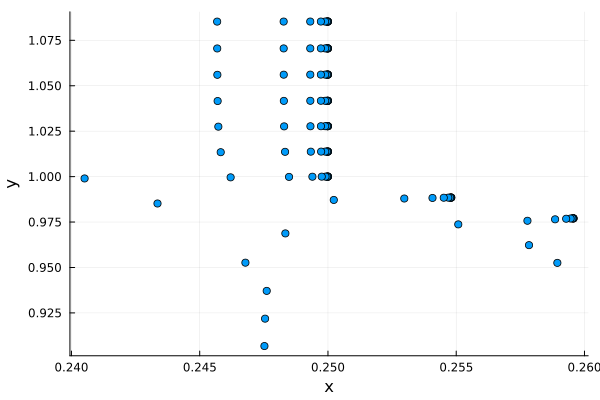

In [33]:
subzpts = pts[pts[:, 3] .== 0., :];
subxpts = subzpts[(subzpts[:, 1] .> 0.24) .&& (subzpts[:, 1] .< 0.26), :];
subpts = subxpts[(subxpts[:, 2] .> 0.9) .&& (subxpts[:, 2] .< 1.1), :];
scatter(subpts[:,1],subpts[:,2],shape=:circle, legend=false, xlabel="x", ylabel="y")